In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Load and procced CIFAR-10
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
#Reshape it
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [4]:
#One hot encoder
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [5]:
#Define Alexnet architechture
model=Sequential()

#1st Cnn layer
model.add(Conv2D(96,(3,3),activation='relu', input_shape=(32,32,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer of cnn
model.add(Conv2D(256,(3,3),activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#3 rd layer
model.add(Conv2D(384,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())

# 4th layer
model.add(Conv2D(384,(3,3),activation="relu", padding='same'))
model.add(BatchNormalization())

#5th layer
model.add(Conv2D(256,(3,3),activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Fltten and Dense layer
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,930,826 (140.88 MB)

 Trainable params: 36,928,074 (140.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,
                  batch_size=128,
                  epochs=20,
                  validation_split=0.2,
                  verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 94ms/step - accuracy: 0.2884 - loss: 3.9680 - val_accuracy: 0.1422 - val_loss: 3.0606
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.4920 - loss: 1.4297 - val_accuracy: 0.4495 - val_loss: 1.6309
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.5903 - loss: 1.1743 - val_accuracy: 0.5626 - val_loss: 1.2173
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6636 - loss: 0.9808 - val_accuracy: 0.6738 - val_loss: 0.9749
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.7163 - loss: 0.8566 - val_accuracy: 0.6811 - val_loss: 0.9296
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7495 - loss: 0.7463 - val_accuracy: 0.7117 - val_loss: 0.8683
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7918 - loss: 0.6272 - val_accuracy: 0.7126 - val_loss: 0.8854
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8240 - loss: 0.5404 - 

In [9]:
#Evaluation and test the accuracy
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=1)
print(f"Test accuracy {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7717 - loss: 0.9941
Test accuracy 0.7685


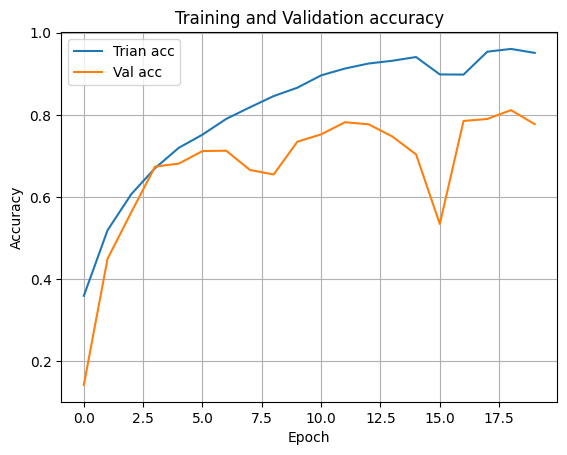

In [10]:
plt.plot(history.history['accuracy'],label="Trian acc")
plt.plot(history.history['val_accuracy'],label="Val acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Inference (Predict sample images)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


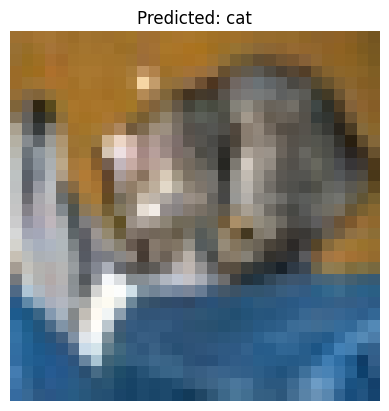

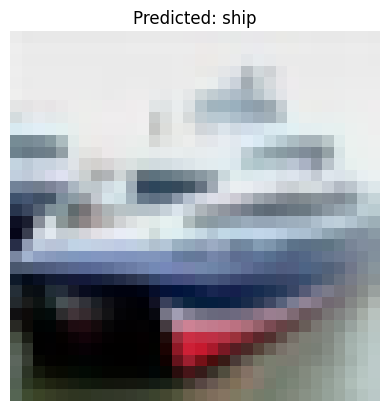

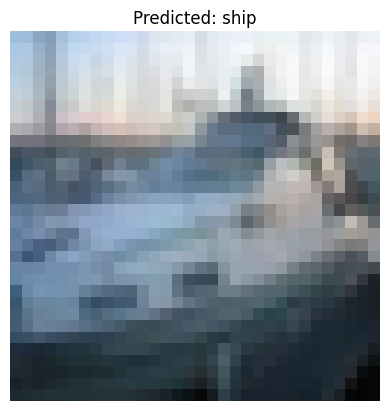

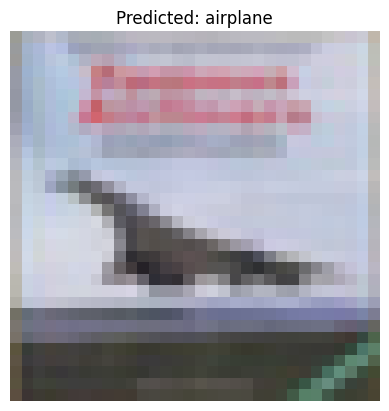

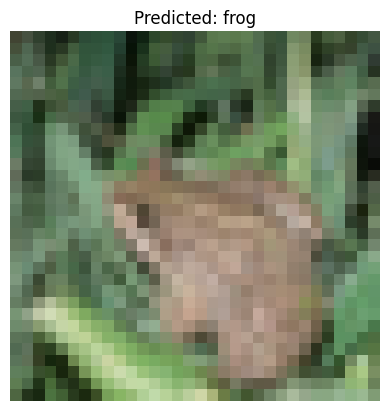

In [12]:

preds = model.predict(x_test[:5])
for i, pred in enumerate(preds):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
    plt.axis('off')
    plt.show()